# MOTOR PRICE PREDICTION:

## Identify and define the problem statement :

### MotorDekho.com is an e-commerce company which acts as a mediator between the parties interested in selling and buying pre-owned motor cars.The company as a part of the its policy recorded data contains the various attributes of the motors cars for which the samples define the attributes for a particular motor car.The goal is to to automate the process of prediction of motor cars prices based on various attributes associated with the car.

### OBJECTIVE :
- The analysis required to build the prediction of motor car prices based on various attributes associated with the car and it will be used for decision making to understand how exactly prices vary with respect to independent variables is one of the most important criteria accordingly we can manipulate the business strategy to increase the profit of the company.

- The model will be a good way for the company management to understand the pricing dynamics of a new market.

- By considering past results, we need to train a model to accurately predict future outcomes.

- Used vehicle market involves many factors when it comes to predicting the fast-selling vehicles that maintain profit and reduce inventory cost for the retailers. Colors, vehicle type, Brand, model, mileage, cost, and vehicle ages are some of the significant factors we need to analyze that affect the time a used vehicle stays in the lot. 

- In general, the customer’s preference is varied and complex. However, there are some characteristics that are highly desirable among used  that Drivetime can prioritize to purchase.

- Lastly;the purpose of this datascience project is to develop a machine learning model that can be leveraged in predicting price of used cars.

### Importing libraries.

In [75]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud, ImageColorGenerator
from sklearn import preprocessing

### Importing CSV file. 

In [2]:
data=pd.read_csv('Currus.csv')
data.head()

,dateCrawled,mtor_name,vendor,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,reg_month,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30-03-2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30-03-2016 00:00,20257,07-04-2016 04:44
1,07-03-2016 09:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,07-03-2016 00:00,88045,26-03-2016 13:17
2,01-04-2016 00:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31-03-2016 00:00,27449,01-04-2016 08:40
3,19-03-2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19-03-2016 00:00,34537,07-04-2016 04:44
4,16-03-2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16-03-2016 00:00,55270,01-04-2016 23:18


### No. of rows and column.

In [3]:
data.shape

(50001, 19)

### Columns are in data set.

In [4]:
data.columns

Index(['dateCrawled', 'mtor_name', 'vendor', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'reg_month', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

### * No of total Null value in data set.
### * And total No. of Null value in each column.

In [5]:
print(data.isnull().sum().sum())
data.isnull().sum()

24989


dateCrawled              0
mtor_name                0
vendor                   0
offerType                0
price                    0
abtest                   0
vehicleType           5188
yearOfRegistration       0
gearbox               2824
powerPS                  0
model                 2758
kilometer                0
reg_month                0
fuelType              4503
brand                    0
notRepairedDamage     9716
dateCreated              0
postalCode               0
lastSeen                 0
dtype: int64

### Total No. of value in each category of vehicleType column.

In [6]:
data['vehicleType'].value_counts()

limousine        13041
small car        10744
station wagon     8990
bus               3995
cabrio            3056
coupe             2536
suv               2011
others             440
Name: vehicleType, dtype: int64

### We have replace the Null values of vehicleType column by groupby brand of vehicleType to its mode value.

In [7]:
data['vehicleType']=data.groupby('brand')['vehicleType'].apply(lambda x:x.fillna(x.mode()[0]))

### Total No. of value in each category of gearbox column.

In [8]:
data['gearbox'].value_counts()

manual       36732
automatic    10445
Name: gearbox, dtype: int64

### We have replace the Null values of gearbox column by groupby brand of gearbox to its mode value.

In [9]:
data['gearbox']=data.groupby('brand')['gearbox'].apply(lambda x:x.fillna(x.mode()[0]))

### Total No. of value in each category of fuelType column.

In [10]:
data['fuelType'].value_counts()

petrol     30214
diesel     14347
lpg          778
cng           80
hybrid        39
other         26
electro       14
Name: fuelType, dtype: int64

### We have replace the Null values of fuelType column by groupby brand of fuelType to its mode value.

In [11]:
data['fuelType']=data.groupby('brand')['fuelType'].apply(lambda x:x.fillna(x.mode()[0]))

### Total No. of value in each category of notRepairedDamage column.

In [12]:
data['notRepairedDamage'].value_counts()

no     35337
yes     4948
Name: notRepairedDamage, dtype: int64

### As we found the value count of notRepairedDamage vehicle is higher on "no" so we replace the NaN with "no"

In [13]:
data['notRepairedDamage']=data['notRepairedDamage'].fillna(value='no')

In [14]:
data.isnull().sum()

dateCrawled              0
mtor_name                0
vendor                   0
offerType                0
price                    0
abtest                   0
vehicleType              0
yearOfRegistration       0
gearbox                  0
powerPS                  0
model                 2758
kilometer                0
reg_month                0
fuelType                 0
brand                    0
notRepairedDamage        0
dateCreated              0
postalCode               0
lastSeen                 0
dtype: int64

#### As Model have small amount of data which can be neglect so we drop all the model row whch have null values .

In [15]:
data.dropna(inplace=True)

### Now updated null value in data set is:

In [16]:
data.isnull().sum().sum()

0

### Now updated shape of data set is:

In [17]:
data.shape

(47243, 19)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47243 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   dateCrawled         47243 non-null  object
 1   mtor_name           47243 non-null  object
 2   vendor              47243 non-null  object
 3   offerType           47243 non-null  object
 4   price               47243 non-null  int64 
 5   abtest              47243 non-null  object
 6   vehicleType         47243 non-null  object
 7   yearOfRegistration  47243 non-null  int64 
 8   gearbox             47243 non-null  object
 9   powerPS             47243 non-null  int64 
 10  model               47243 non-null  object
 11  kilometer           47243 non-null  int64 
 12  reg_month           47243 non-null  int64 
 13  fuelType            47243 non-null  object
 14  brand               47243 non-null  object
 15  notRepairedDamage   47243 non-null  object
 16  dateCreated         47

In [19]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,reg_month,postalCode
count,4.724300e+04,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000
mean,6.360156e+03,2004.609572,117.713524,125956.437991,5.834854,50956.160384
std,7.397599e+04,85.708928,228.352072,39599.597394,3.673942,25726.052858
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.200000e+03,1999.000000,75.000000,125000.000000,3.000000,30855.000000
50%,3.000000e+03,2004.000000,109.000000,150000.000000,6.000000,49681.000000
75%,7.300000e+03,2008.000000,150.000000,150000.000000,9.000000,71665.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [20]:
f_oneway(data[data['vendor']=='private']['price'],data[data['vendor']=='commercial']['price'])

F_onewayResult(statistic=0.012126244044579721, pvalue=0.9123152881167181)

In [21]:
f_oneway(data[data['abtest']=='test']['price'],data[data['abtest']=='control']['price'])

F_onewayResult(statistic=0.09297105680545537, pvalue=0.7604348576479545)

In [22]:
print(data['price'].min())
print(data['price'].max())

0
12345678


In [23]:
data['powerPS']=data.groupby('brand')['powerPS'].apply(lambda x:x.replace(range(0,40),x.mean()))

In [24]:
data['yearOfRegistration']=data['yearOfRegistration'].replace(range(1000,1900),data['yearOfRegistration'].mean())

In [25]:
data['yearOfRegistration']=data['yearOfRegistration'].replace(range(2020,10000),data['yearOfRegistration'].mean())

In [26]:
data['price']=data['price'].replace(9999999,data['price'].mean())
data['price']=data['price'].replace(12345678,data['price'].mean())
data['price']=data['price'].replace(range(10010011,10000),data['price'].mean())

In [27]:
data['reg_month']=data['reg_month'].replace(0,3)

In [28]:
data.drop(["dateCrawled","vendor","offerType","abtest","lastSeen","dateCreated"],axis="columns", inplace= True)

In [29]:
data.shape

(47243, 13)

In [30]:
data

,mtor_name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,reg_month,fuelType,brand,notRepairedDamage,postalCode
0,Zu_verkaufen,4450.0,limousine,2003.0,manual,150.000000,3er,150000,3,diesel,bmw,no,20257
1,Volvo_XC90_2.4D_Summum,13299.0,suv,2005.0,manual,163.000000,xc_reihe,150000,6,diesel,volvo,no,88045
2,Volkswagen_Touran,3200.0,bus,2003.0,manual,101.000000,touran,150000,11,diesel,volkswagen,no,27449
3,Seat_Ibiza_1.4_16V_Reference,4500.0,small car,2006.0,manual,86.000000,ibiza,60000,12,petrol,seat,no,34537
4,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,18750.0,suv,2008.0,automatic,185.000000,xc_reihe,150000,11,diesel,volvo,no,55270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,Suche_VW_T5_Multivan,0.0,bus,2005.0,manual,99.457163,transporter,150000,3,petrol,volkswagen,no,29690
49997,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,19999.0,limousine,1990.0,manual,99.457163,golf,5000,3,petrol,volkswagen,no,50181
49998,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,0.0,coupe,2004.0,manual,171.687524,3er,150000,1,petrol,bmw,no,86956
49999,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,100.0,station wagon,2000.0,manual,76.431655,megane,150000,8,petrol,renault,no,65232


# Univariate Analysis

In [31]:
data.groupby("vehicleType")["vehicleType"].agg("count")

vehicleType
bus               3880
cabrio            2882
coupe             2409
limousine        14742
others             376
small car        12236
station wagon     8785
suv               1933
Name: vehicleType, dtype: int64

In [32]:
data.groupby("model")["model"].agg("count")

model
100         52
145          4
147         66
156         77
159         20
          ... 
yaris      143
yeti        27
ypsilon     26
z_reihe    129
zafira     398
Name: model, Length: 248, dtype: int64

In [33]:
data.groupby("brand")["brand"].agg("count")

brand
alfa_romeo         263
audi              4283
bmw               5210
chevrolet          226
chrysler           177
citroen            662
dacia              133
daewoo              70
daihatsu            79
fiat              1182
ford              3214
honda              326
hyundai            436
jaguar              85
jeep               103
kia                312
lada                30
lancia              61
land_rover          90
mazda              721
mercedes_benz     4600
mini               436
mitsubishi         395
nissan             698
opel              5162
peugeot           1397
porsche            306
renault           2363
rover               56
saab                73
seat               974
skoda              750
smart              674
subaru             126
suzuki             282
toyota             578
trabant             70
volkswagen       10178
volvo              462
Name: brand, dtype: int64

In [34]:
data.groupby("kilometer")["kilometer"].agg("count")

kilometer
5000        791
10000       232
20000       697
30000       740
40000       825
50000       964
60000      1156
70000      1234
80000      1459
90000      1579
100000     1999
125000     4903
150000    30664
Name: kilometer, dtype: int64

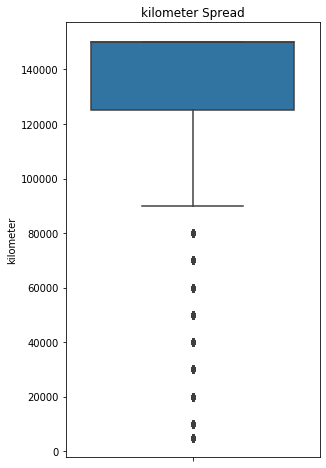

In [35]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,2)
plt.title('kilometer Spread')
sb.boxplot(y=data.kilometer)

plt.show()

Infrance: Range of data sets start from 0 to laks which means both new and old vehicle are for resale.

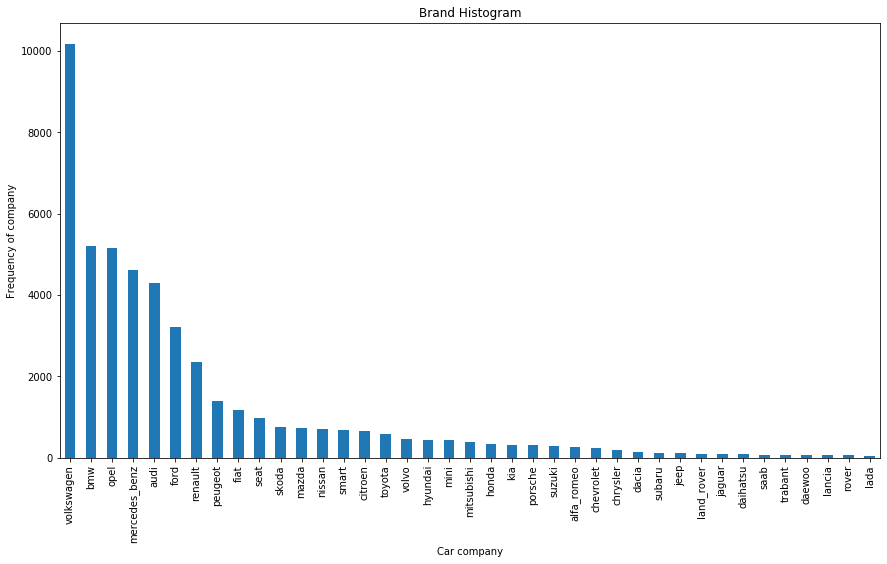

In [36]:
plt.figure(figsize=(50, 8))

plt.subplot(1,3,1)
plt1 = data.brand.value_counts().plot(kind='bar')
plt.title('Brand Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.show()

#### Infrance : this shows most of the people like to buy Volkswagan cars.

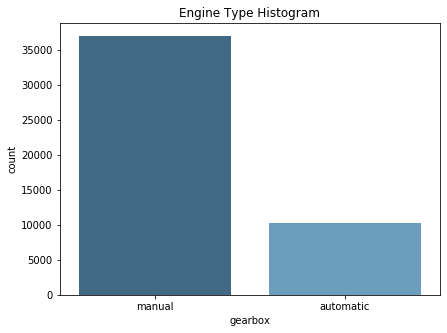

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sb.countplot(data.gearbox, palette=("Blues_d"))

plt.show()

### This shows that resale of malual cars are more as compare to automatic.

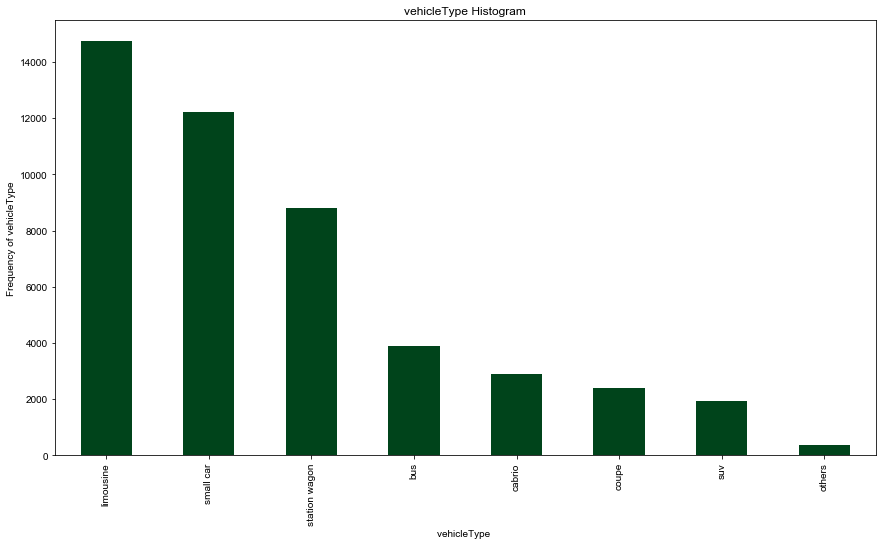

In [38]:
plt.figure(figsize=(50, 8))

plt.subplot(1,3,1)
plt1 = data.vehicleType.value_counts().plot(kind='bar', cmap='Greens_r')
plt.title('vehicleType Histogram')
plt1.set(xlabel = 'vehicleType ', ylabel='Frequency of vehicleType')
sb.set_style('white')
plt.show()

### This shows that resale of limousine are much heigher then others.

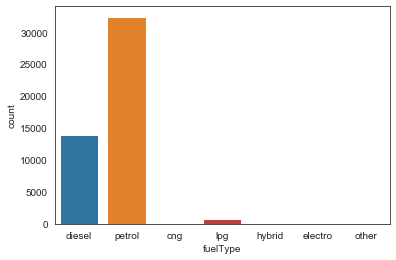

In [39]:
sb.countplot(data["fuelType"],label='count')

### This show that manual vehicle are more prefiable then automatic gear box

### Correlation

In [40]:
data.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

kilometer             0.310889
yearOfRegistration    0.225263
powerPS               0.126900
postalCode            0.054733
reg_month             0.024445
Name: price, dtype: float64

In [41]:
data.corr().loc[:,'price'].abs()

price                 1.000000
yearOfRegistration    0.225263
powerPS               0.126900
kilometer             0.310889
reg_month             0.024445
postalCode            0.054733
Name: price, dtype: float64

In [42]:
data.corr()

,price,yearOfRegistration,powerPS,kilometer,reg_month,postalCode
price,1.000000,0.225263,0.126900,-0.310889,0.024445,0.054733
yearOfRegistration,0.225263,1.000000,0.039369,-0.248866,0.025304,0.021467
powerPS,0.126900,0.039369,1.000000,-0.015928,0.005778,0.009559
kilometer,-0.310889,-0.248866,-0.015928,1.000000,-0.001501,-0.027608
reg_month,0.024445,0.025304,0.005778,-0.001501,1.000000,0.006735
postalCode,0.054733,0.021467,0.009559,-0.027608,0.006735,1.000000


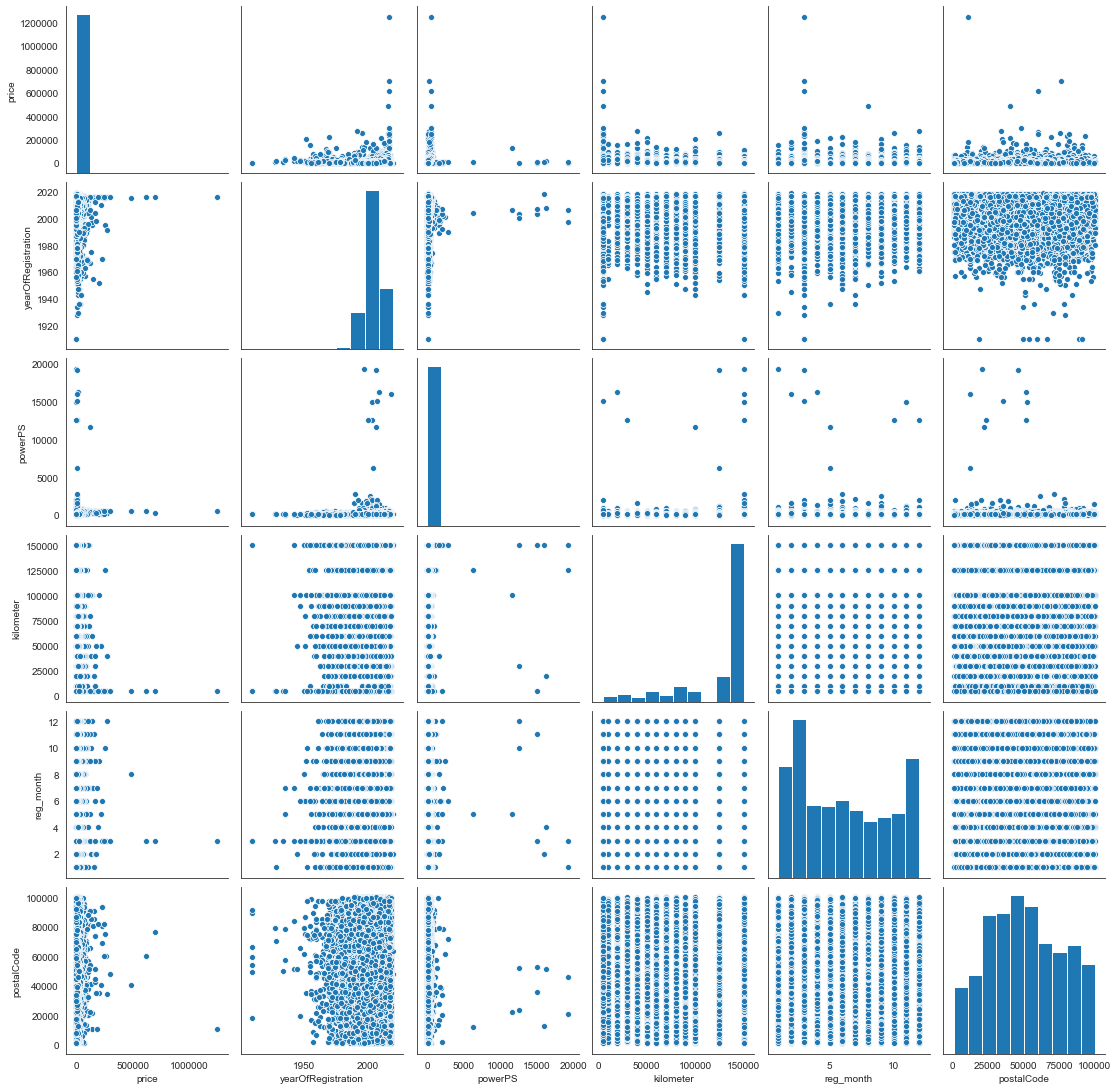

In [43]:
sb.pairplot(data)

### Bivariate analysis

<Figure size 720x360 with 0 Axes>

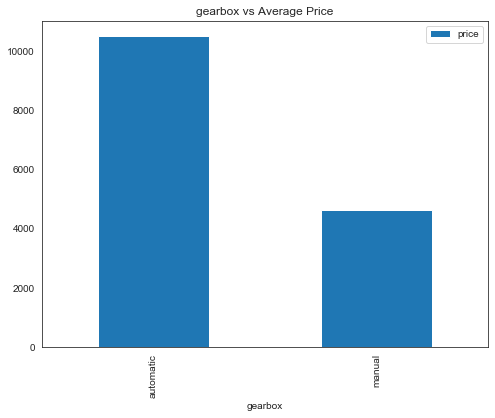

In [44]:
plt.figure(figsize=(10,5))

df = pd.DataFrame(data.groupby(['gearbox'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('gearbox vs Average Price')
plt.show()

- Avrage price of automatic vehicles are more than manual vehicles.

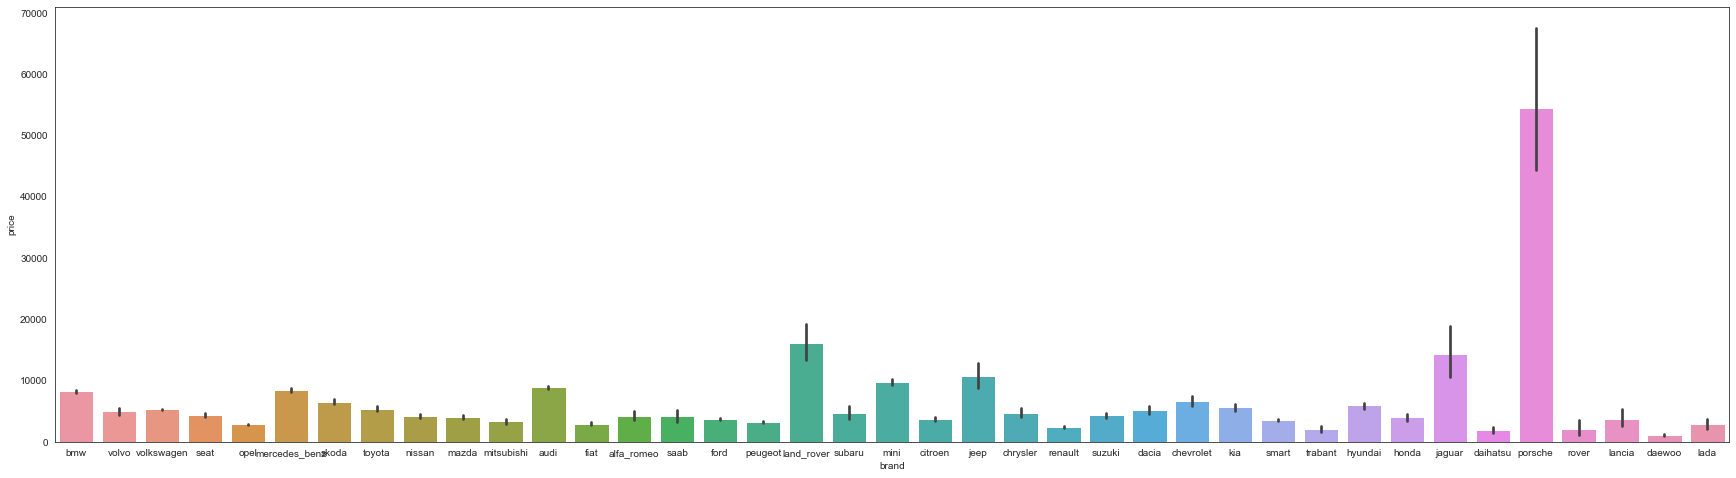

In [45]:
plt.figure(figsize=(30,8))
sb.barplot(data['brand'],data['price'])

- Here price of porche is higher than other vehicles

<Figure size 3600x1080 with 0 Axes>

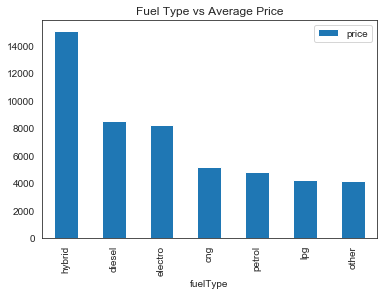

In [46]:
plt.figure(figsize=(50, 15))
df = pd.DataFrame(data.groupby(['fuelType'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

- Avrage price of hybrid vehicle is higher than others.

<Figure size 10800x1296 with 0 Axes>

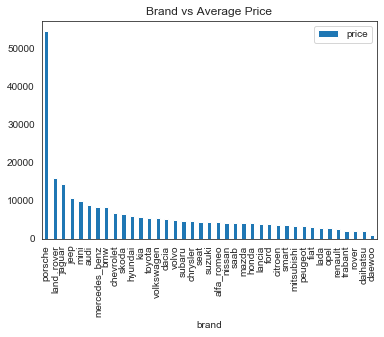

In [47]:
plt.figure(figsize=(150,18))
df = pd.DataFrame(data.groupby(['brand'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Brand vs Average Price')
plt.show()

- Avrage price of porche vehicle is higher than others.

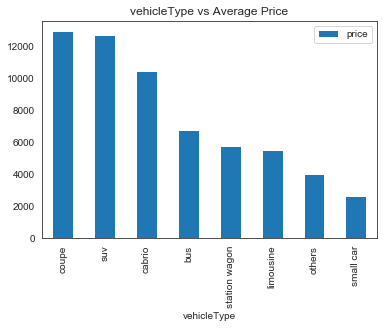

In [48]:
df = pd.DataFrame(data.groupby(['vehicleType'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('vehicleType vs Average Price')
plt.show()

- Avrage price of coupe vehicle is higher than others.

In [49]:
data.groupby(["brand","vehicleType"])["fuelType"].count().reset_index().sort_values(by="fuelType",ascending=False).head(10)

,brand,vehicleType,fuelType
251,volkswagen,limousine,3788
17,bmw,limousine,2822
253,volkswagen,small car,2415
166,opel,small car,2183
132,mercedes_benz,limousine,2141
9,audi,limousine,1892
254,volkswagen,station wagon,1651
12,audi,station wagon,1578
248,volkswagen,bus,1367
76,ford,small car,1305


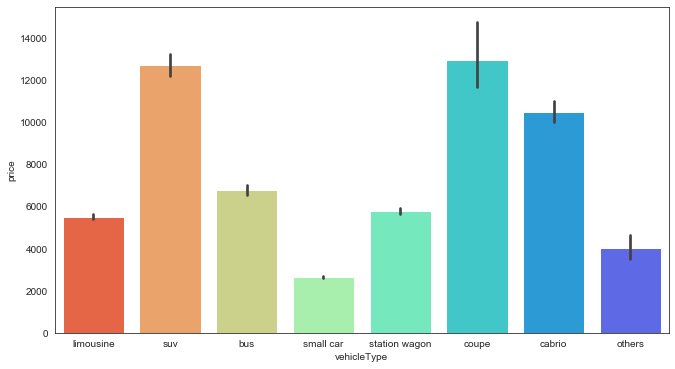

In [50]:
plt.figure(figsize=(11,6))
sb.barplot(x='vehicleType',y="price",data=data,palette='rainbow_r')

- Price of hybrid vehicle is higher than others.

### Corrlation and Heatmap

In [51]:
data.corr(method="spearman")

,price,yearOfRegistration,powerPS,kilometer,reg_month,postalCode
price,1.000000,0.580268,0.533966,-0.386422,0.087748,0.089366
yearOfRegistration,0.580268,1.000000,0.193946,-0.355159,0.024437,0.035198
powerPS,0.533966,0.193946,1.000000,0.030787,0.038988,0.076961
kilometer,-0.386422,-0.355159,0.030787,1.000000,-0.012687,-0.032171
reg_month,0.087748,0.024437,0.038988,-0.012687,1.000000,0.008202
postalCode,0.089366,0.035198,0.076961,-0.032171,0.008202,1.000000


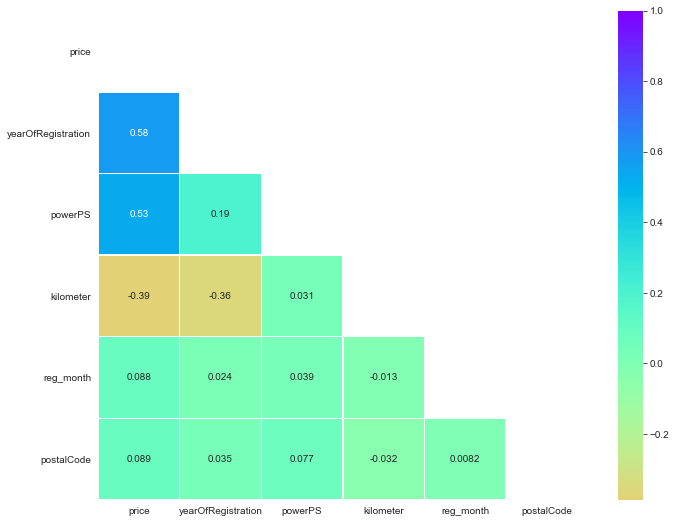

In [52]:
corr =data.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sb.diverging_palette(220, 10, as_cmap=True)
heatmap = sb.heatmap(corr, mask=mask, cmap='rainbow_r', center=0.0,
vmax = 1, square=True, linewidths=.5, ax=ax,annot=True)
sb.set_style('white')
plt.savefig('corr-heat.png')
plt.show()

<Figure size 720x432 with 0 Axes>

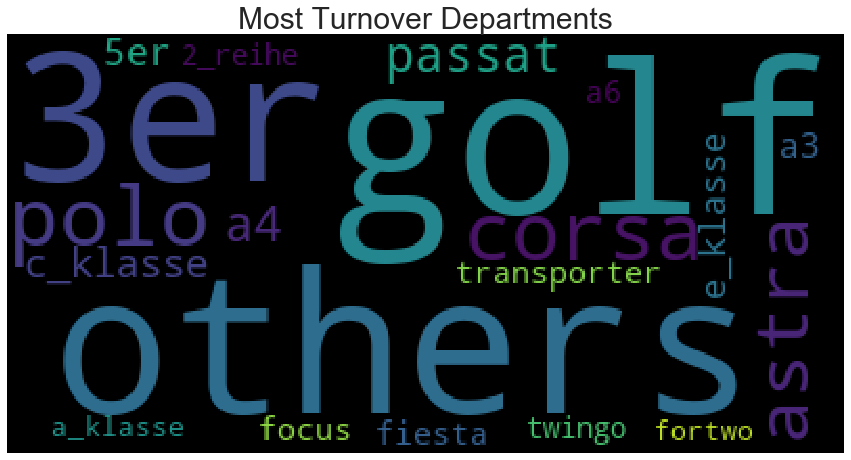

In [53]:
text = " ".join(str(each) for each in data.model)
wordcloud = WordCloud(max_words=20).generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title('Most Turnover Departments',fontsize = 30)
plt.axis("off")
plt.show()

### Multivariate

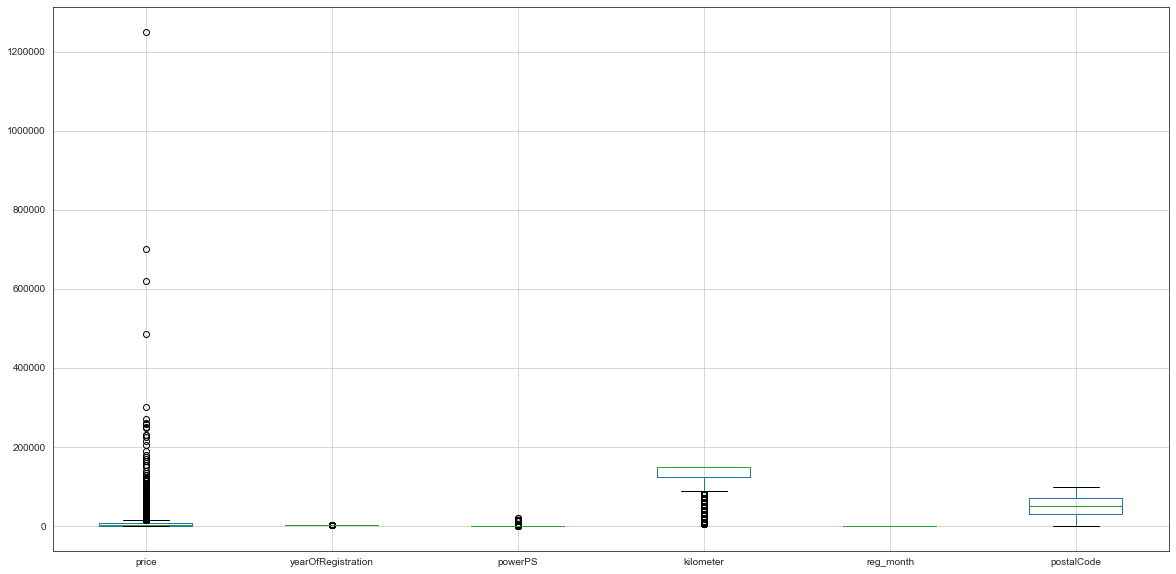

In [54]:
plt.figure(figsize=(20, 10))
data.boxplot()

## let's obtain some inferences by applying some hypothesis:
# Hypothesis:

### 1st assumption:
#### Applying ANOVA between gearbox and price:

#### NULL HYPOTHESIS: Mean price for manual transmission=Mean price for automatic transmission.
#### ALTERNATE HYPOTHESIS: Mean price for manual transmission is not equal to Mean price for automatic transmission.

In [55]:
f_oneway(data[data['gearbox']=='manual']['price'],data[data['gearbox']=='automatic']['price'])

F_onewayResult(statistic=2129.3759166963555, pvalue=0.0)

#### p value > 0.05,therefore null hypothesis is accept, ie, means are equal
#### This means that price is independent on the type of the gearbox
#### manual  will get high and automatic we will get low 

# 2d Assumption:
- Applying ANOVA between notRepairedDamage and price
- NULL HYPOTHESIS: Mean price for repairing done=Mean price for repairing not done
- ALTERNATE HYPOTHESIS: Mean price for repairing done is not equal to Mean price for repairing not done


- p value <0.05 means that null hypotheses is rejected which means that the mean price of car when 
- it is repaired is not equal to the mean price of the car when it is not repaired.
- This means that price is depending on the repairing

In [56]:
f_oneway(data[data["notRepairedDamage"]=='no']['price'],data[data['notRepairedDamage']=='yes']['price'])

F_onewayResult(statistic=550.3887998840012, pvalue=5.114218916891571e-121)

#### Checking dependency between independent variables, using CHI Square Test:
- NULL HYPOTHESES: Fuel type and gearbox are independent
- ALTERNATE HYPOTHESES: Fuel type and gearbox are dependent

In [57]:
table=pd.crosstab(index=data['fuelType'],columns=data['gearbox'])
chi2_contingency(table)

(1420.7572085526003,
 7.756477932364911e-304,
 6,
 array([[1.70849226e+01, 6.19150774e+01],
        [3.01819216e+03, 1.09378078e+04],
        [2.81144297e+00, 1.01885570e+01],
        [7.56926952e+00, 2.74307305e+01],
        [1.55926952e+02, 5.65073048e+02],
        [2.81144297e+00, 1.01885570e+01],
        [7.01260381e+03, 2.54133962e+04]]))

- p value is 0<0.05, so null hypotheses is rejected,ie fueltype 
- and the gearbox are related to each other so we can 'DROP' any one from 2.

In [58]:
table1=pd.crosstab(index=data['brand'],columns=data['vehicleType'])
a,p,df,arr=chi2_contingency(table1)
p

0.0

#### p value<0.05, therefore brand and vehicle depends on each other

#### Checking correlation between powerPS and price

In [59]:
data[['powerPS','price']].corr()

,powerPS,price
powerPS,1.0000,0.1269
price,0.1269,1.0000


- price is also depending on the power of the cars corr range is -1 to 1 if its nearto
- near to o no linearly corelation
- 1 positively highely corelated
- 0.02price which is nearly to 0 

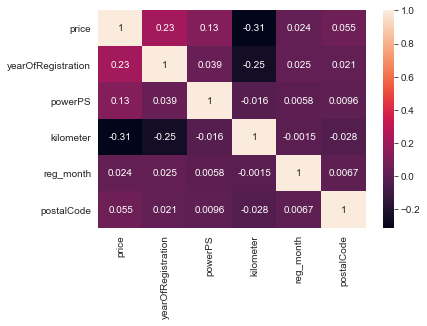

In [60]:
import seaborn as sb
sb.heatmap(data.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B8EE47B70>,
      dtype=object)

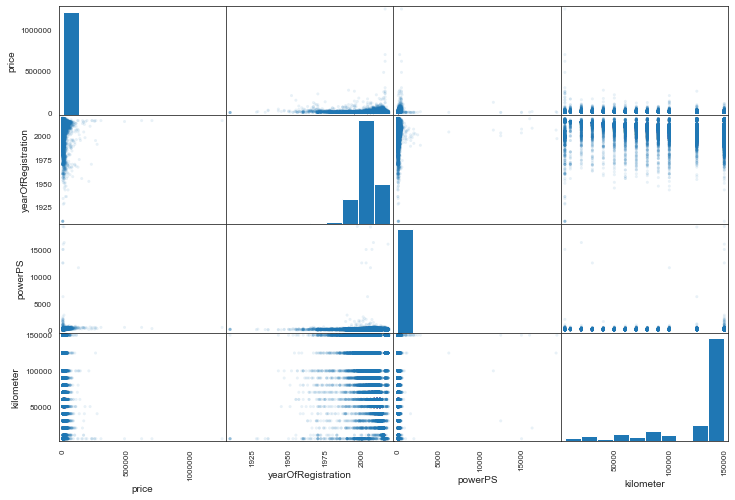

In [61]:
numerical_attributes=["price","yearOfRegistration","powerPS","kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(data[numerical_attributes],figsize=(12,8),alpha=0.1)

- From above plot it seems like that the most of the cars been registered after 1990 and have lower powerPS (lower horsepower )than 180 and many cars have more than approximately 13000kilometers. 

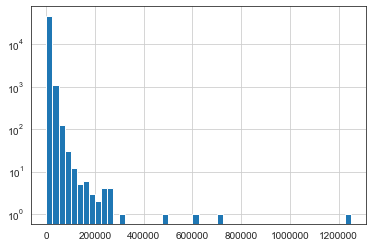

In [62]:
data["price"].hist(bins=50,log=True)

In [63]:
data=pd.read_csv('Currus.csv')
data.head(2)

,dateCrawled,mtor_name,vendor,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,reg_month,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30-03-2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30-03-2016 00:00,20257,07-04-2016 04:44
1,07-03-2016 09:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,07-03-2016 00:00,88045,26-03-2016 13:17


In [64]:
# Try without dropping
data.drop(["dateCrawled","vendor","offerType","abtest","lastSeen","dateCreated","reg_month"],axis="columns", inplace= True)

In [65]:
data1= data._get_numeric_data()

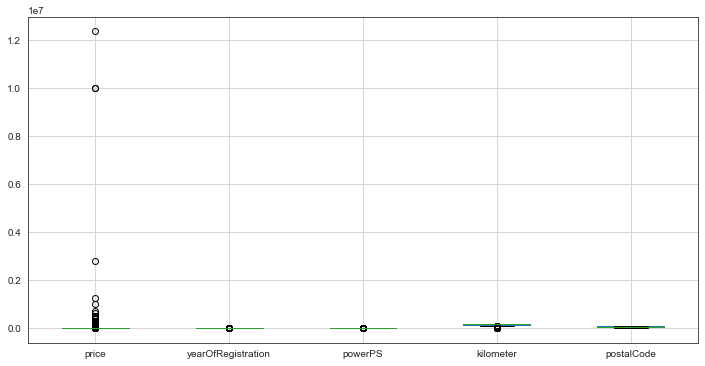

In [66]:
plt.figure(figsize=(12,6))
data1.boxplot()

In [67]:
sc = StandardScaler()
data2= pd.DataFrame(sc.fit_transform(data1))
data2.columns=data1.columns
print(data2.head(2))

      price  yearOfRegistration   powerPS  kilometer  postalCode
0 -0.024585           -0.020686  0.145312   0.606552   -1.185475
1  0.078529           -0.004425  0.201695   0.606552    1.447739


In [68]:
# Notice period
for i in data2.columns:
    q1,q2,q3 = data2[i].quantile([0.25,0.50,0.75])
    IQR = q3-q1
    LB = q1 - 1.5*IQR
    UB = q3 + 1.5*IQR
    count = 0
    for k in data2[i]:
        if k < LB or k > UB:
            count+=1
    print('outlier count of {} is {}'.format(i,count))
    
    max1,min1 = data2[i].quantile([0.99,0.001])
    
    for j in data2[i]:
        if j > UB:
            data2[i].replace(j,max1,inplace=True)
        elif j < LB:
            data2[i].replace(j,min1,inplace=True)
        else:
            pass

outlier count of price is 3757
outlier count of yearOfRegistration is 959
outlier count of powerPS is 1505
outlier count of kilometer is 8671
outlier count of postalCode is 0


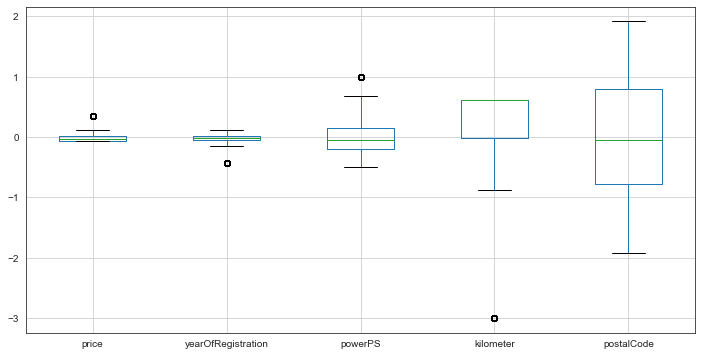

In [69]:
plt.figure(figsize=(12,6))
data2.boxplot()

In [70]:
num_motors_data11=data2.join(data[["vehicleType","gearbox","fuelType","brand","model","notRepairedDamage"]])

### Creating dummy 

In [71]:
motor_dummies=pd.get_dummies(data=num_motors_data11,drop_first=True)
motor_dummies.head(2)

,price,yearOfRegistration,powerPS,kilometer,postalCode,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,...,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,notRepairedDamage_yes
0,-0.024585,-0.020686,0.145312,0.606552,-1.185475,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.078529,-0.004425,0.201695,0.606552,1.447739,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [72]:
X= motor_dummies.iloc[:,1:]
Y= motor_dummies.iloc[:,0]

In [80]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

## LinearRegression

In [81]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
mm_scaler.transform(X_test)

array([[0.95454545, 0.30523256, 0.65517241, ..., 0.        , 0.        ,
        0.        ],
       [0.63636364, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.96969697, 0.30523256, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.81818182, 0.18313953, 0.5862069 , ..., 0.        , 0.        ,
        0.        ],
       [0.68181818, 0.21802326, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.92424242, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [82]:
lreg=LinearRegression()
lreg.fit(X_train_minmax,Y_train)
print(lreg.intercept_)
#print(lreg.coef_)

-0.12761307140219044


In [83]:
Y_pred = lreg.predict(X_train_minmax)

In [84]:
rmse = np.sqrt(mean_squared_error(Y_train,Y_pred))
print('RMSE',rmse)
r2=r2_score(Y_train,Y_pred)
print('regressor score is =',r2)

RMSE 0.0722376398502475
regressor score is = 0.5682925219147963
